In [15]:
import nltk
import gensim
from gensim.models.doc2vec import Doc2Vec



docs=Doc2Vec.load("world_history_doc2vec.bin")
newdoc=[]
for doc in docs.docvecs:
   newdoc.append(doc) 

print(len(newdoc))

1373


In [16]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.manifold import TSNE

titles=list(docs.docvecs.doctags.keys())


print(titles)

['Geodetic grids in authoritative maps–new findings about the origin of the UTM Grid', 'Fifty years of IAA History Symposia (1967–2016)', "From global to local and back: The 'Third World' concept and the new radical left in France", 'Toward Embracing Multiple Perspectives in World History Curricula: Interrogating Representations of Intercultural Exchanges Between Ancient Civilizations in Quebec Textbooks', 'The purgatorial shadows of war: Accounting, blame and shell shock pensions, 1914–1923', 'The egyptian labor corps: Workers, peasants, and the state in world war I', 'The I and World history in Hegel', '‘Knights of the Air’: joyful slaughter and the pleasures of moral survival', 'The deadliest enemies of Australia: the politics of intelligence during the Australian conscription controversies of 1916–1917', 'Methods for extracting the important portions from the contexts in research document creation involving explorations', 'How the Anatomische Gesellschaft excluded unwanted members 

In [17]:
a_titles=[]
a_doc=[]
i=0
for title in titles:
    a_doc.append(newdoc[i])
    a_titles.append(" ".join(title.split(" ")[:10]))
    i=i+1


In [18]:
first_elements=100
newdoc=newdoc[:first_elements]
titles=titles[:first_elements]

In [19]:

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(a_doc)

Y=Y*100

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


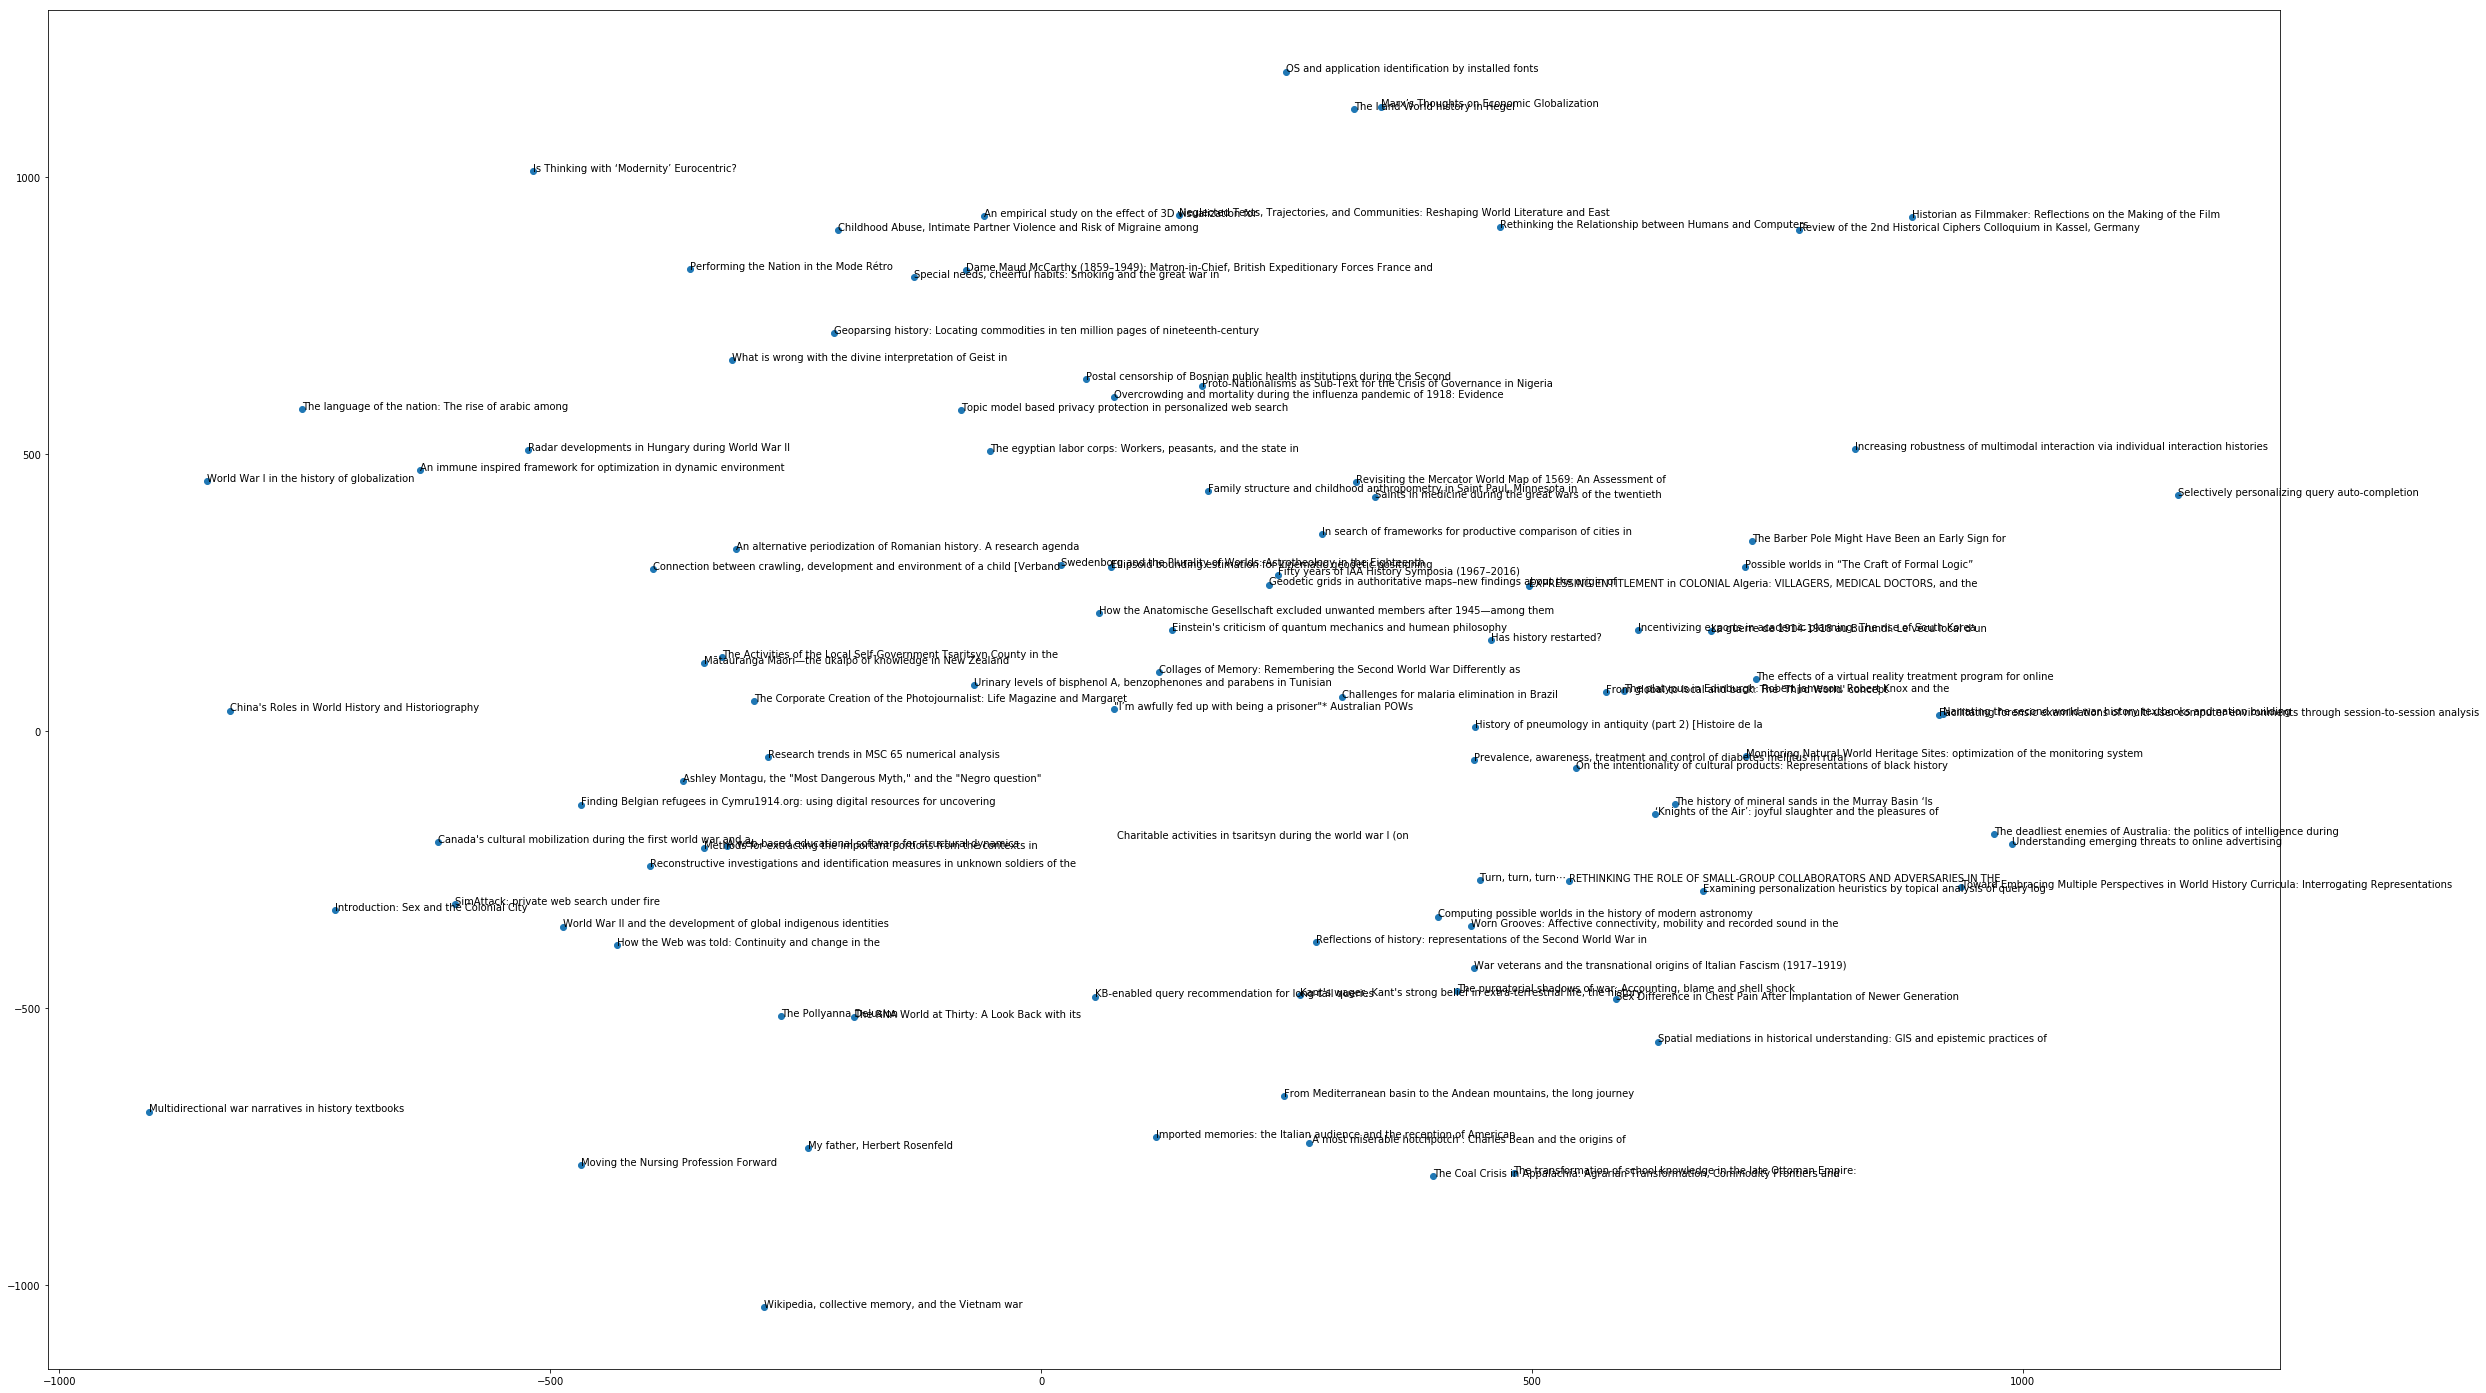

In [20]:
%pylab inline
pylab.rcParams['figure.figsize'] = (40,25)
plt.scatter(Y[:, 0][:100], Y[:, 1][:100])
i=0
for label, x, y in zip(a_titles, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    i+=1
    if i>100: break
plt.show()
